<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification/blob/main/DSOC_Paper_Figure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/Dusty-Stellar-Sources-Classification.git

Cloning into 'Dusty-Stellar-Sources-Classification'...
remote: Enumerating objects: 453, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 453 (delta 100), reused 85 (delta 49), pack-reused 280
Receiving objects: 100% (453/453), 65.41 MiB | 9.81 MiB/s, done.
Resolving deltas: 100% (238/238), done.
Updating files: 100% (47/47), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_simple = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df_simple['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df_simple[df_simple.columns[2:-2]]
Y = Y['EY']

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state = 0 )
df_simple[df_simple.columns[2:-2]] = imp.fit_transform(df_simple[df_simple.columns[2:-2]])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( df_simple[df_simple.columns[2:-1]] , Y , test_size= 0.15 , random_state = 1234 )
print('X_train : ' , X_train.shape)
print('X_test : ' , X_test.shape)
print('Y_train : ' , Y_train.shape)
print('Y_test : ' , Y_test.shape)

X_train :  (525, 13)
X_test :  (93, 13)
Y_train :  (525,)
Y_test :  (93,)


In [ ]:
df_simple_ = X_train
df_simple_ = np.round(df_simple_,5)

In [ ]:
len(Y_test[Y_test==2])

4

In [ ]:
df_smote = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Smote_train_data.csv", index_col = 'Unnamed: 0' )

In [ ]:
df_smote_ = np.round(df_smote,5)
df_smote_['index'] = df_smote_.index

In [ ]:
df_concate = pd.merge(df_smote_,df_simple_,on = list(df_smote.columns)[0:12] ,how='inner')

In [ ]:
df_concate

,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass_x,index,SpClass_y
0,-2.14300,-4.15200,-5.75400,-8.48234,-9.73100,-10.538,-10.889,-11.07980,-11.29050,-11.59030,-11.94010,-14.03250,RSG,2,RSG
1,-2.14300,-4.15200,-5.75400,-8.48234,-9.73100,-10.538,-10.889,-11.07980,-11.29050,-11.59030,-11.94010,-14.03250,RSG,157,RSG
2,-0.12100,0.32300,-0.57600,0.26600,-2.38400,-3.738,-5.807,-8.60830,-9.72390,-10.67760,-12.05620,-15.95760,YSO,6,YSO
3,-0.12100,0.32300,-0.57600,0.26600,-2.38400,-3.738,-5.807,-8.60830,-9.72390,-10.67760,-12.05620,-15.95760,YSO,38,YSO
4,-1.34944,-0.56414,-0.81062,-1.58318,-3.22800,-4.482,-6.364,-9.07330,-10.29720,-11.39240,-12.46760,-18.12300,YSO,19,YSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,-2.46631,-1.95800,-2.77600,-2.82900,-4.39700,-4.937,-6.263,-8.26296,-9.10836,-10.13781,-11.30793,-15.48156,YSO,550,YSO
650,0.51894,0.81425,0.07097,-1.36859,-3.23587,-5.049,-6.793,-9.54390,-10.33820,-11.03870,-11.61040,-12.85200,CAGB,552,CAGB
651,-0.75300,1.53100,-0.65200,-1.39400,-2.04000,-2.524,-3.098,-4.92061,-5.72014,-7.38690,-9.07102,-14.22930,YSO,553,YSO
652,1.65900,0.18800,-1.60600,-4.62700,-6.26100,-7.204,-7.530,-7.75420,-7.76940,-7.92520,-8.16120,-9.48600,OAGB,554,OAGB


In [ ]:
len(np.unique(df_concate['index']))

536

In [ ]:
np.unique(df_concate['index'])

array([  2,   6,  19,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 20

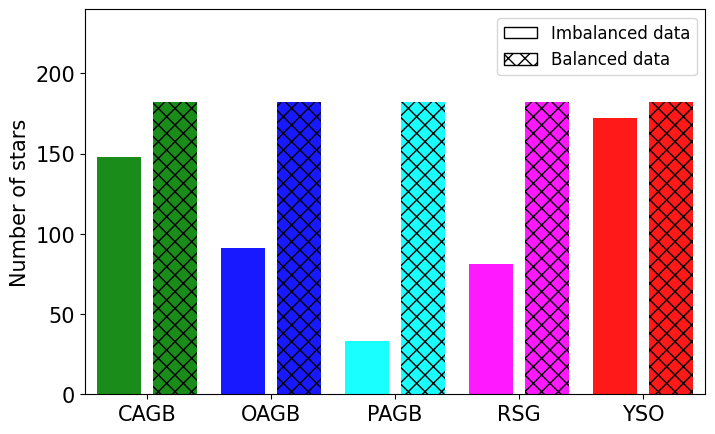

In [ ]:
n = df_smote.pivot_table(index=['SpClass'], aggfunc='size').index

s_smote = list(df_smote.pivot_table(index=['SpClass'], aggfunc='size'))
s_simple = list(X_train.pivot_table(index=['SpClass'], aggfunc='size'))

colors = ['green','blue','cyan','magenta','red']

# Set the width of the bars
bar_width = 0.35

# Create positions for the bars
x = np.arange(len(n))

fig=plt.figure(figsize=(8,5))
# Create the bar chart for the first dataset

plt.bar(x - (bar_width/2 + 0.05), s_simple, bar_width, color= colors,alpha = 0.9)
# Create the bar chart for the second dataset
plt.bar(x + (bar_width/2 + 0.05), s_smote, bar_width, color=colors,alpha = 0.9,hatch='xx')


plt.bar([7], s_simple[0], bar_width , label='Imbalanced data' , color= "white",edgecolor='black')
# Create the bar chart for the second dataset
plt.bar([7.5], s_smote[0], bar_width, label='Balanced data' , color="white" ,hatch='xx',edgecolor='black')

#plt.bar(n  , [s_simple,s_smote]  , color = colors , log  = False )
#plt.bar(n  , s_smote  , color = colors , log  = False )

plt.xticks(x, n, fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of stars', fontsize=15)
#plt.tick_params(axis='both', which='minor', labelsize=15)


plt.ylim(0,240)
plt.xlim(-0.5,4.5)
plt.legend(fontsize='large')
plt.show()
fig.savefig('SPclass_hist.pdf',dpi=400)

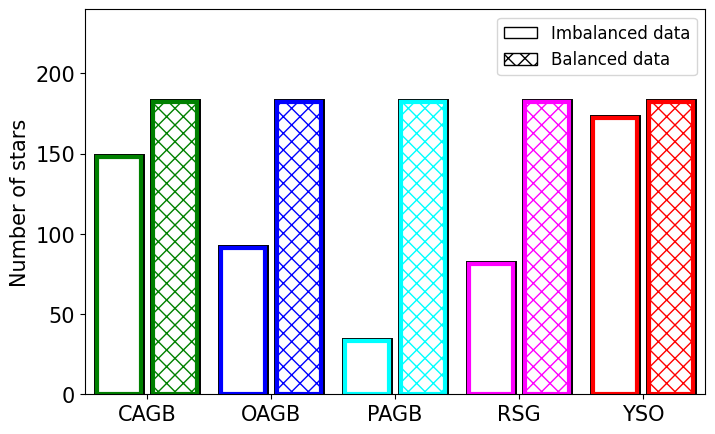

In [ ]:
n = df_smote.pivot_table(index=['SpClass'], aggfunc='size').index

s_smote = list(df_smote.pivot_table(index=['SpClass'], aggfunc='size'))
s_simple = list(X_train.pivot_table(index=['SpClass'], aggfunc='size'))

colors = ['green','blue','cyan','magenta','red']

# Set the width of the bars
bar_width = 0.35

# Create positions for the bars
x = np.arange(len(n))

fig=plt.figure(figsize=(8,5))
# Create the bar chart for the first dataset

plt.bar(x - (bar_width/2 + 0.05), s_simple, bar_width , facecolor='white',edgecolor="black",lw=5)
plt.bar(x - (bar_width/2 + 0.05), s_simple, bar_width , facecolor='white',edgecolor=colors,lw=3)
# Create the bar chart for the second dataset
plt.bar(x + (bar_width/2 + 0.05), s_smote, bar_width, facecolor='white',edgecolor='black',lw=5)
plt.bar(x + (bar_width/2 + 0.05), s_smote, bar_width, facecolor='white',edgecolor=colors,hatch='xx',lw=3)


plt.bar([7], s_simple[0], bar_width , label='Imbalanced data' , color= "white",edgecolor='black')
# Create the bar chart for the second dataset
plt.bar([7.5], s_smote[0], bar_width, label='Balanced data' , color="white" ,hatch='xx',edgecolor='black')

#plt.bar(n  , [s_simple,s_smote]  , color = colors , log  = False )
#plt.bar(n  , s_smote  , color = colors , log  = False )

plt.xticks(x, n, fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Number of stars', fontsize=15)
#plt.tick_params(axis='both', which='minor', labelsize=15)


plt.ylim(0,240)
plt.xlim(-0.5,4.5)
plt.legend(fontsize='large')
plt.show()

fig.savefig('SPclass_hist_prime.pdf',dpi=400)

#CMDs


In [ ]:
All_star_LMC = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/LMC_ALL_Star",sep = ';')
All_star_LMC = All_star_LMC.replace('       ',np.nan)
All_star_LMC = All_star_LMC.apply(pd.to_numeric)

In [ ]:
All_star_LMC

,_RAJ2000,_DEJ2000,RAJ2000,DEJ2000,2MASSJ,2MASSH,2MASSKs,IRAC1,IRAC2,IRAC3,IRAC4,IRSFJ,IRSFH,IRSFKs
0,65.047441,-69.534480,65.047441,-69.534480,13.7493,12.8358,12.5977,12.4946,NaN,12.4287,NaN,NaN,NaN,NaN
1,65.160221,-69.378564,65.160221,-69.378564,14.6321,13.7738,13.5568,13.4426,13.5481,13.5872,13.6080,NaN,NaN,NaN
2,65.192170,-69.719720,65.192170,-69.719720,15.5542,14.7705,14.6408,14.5237,14.5543,14.7498,NaN,NaN,NaN,NaN
3,65.192469,-69.660937,65.192469,-69.660937,13.7523,12.9307,12.7567,12.6754,12.7255,12.6779,12.6262,NaN,NaN,NaN
4,65.196116,-69.716709,65.196116,-69.716709,15.1836,14.4238,14.4713,14.2186,14.2523,14.3061,14.2936,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196999,93.873374,-64.195537,93.873374,-64.195537,14.9244,14.3496,14.3012,NaN,14.1660,NaN,NaN,NaN,NaN,NaN
197000,93.874777,-64.050694,93.874777,-64.050694,14.7274,13.9357,13.9289,13.8275,13.8364,13.7894,13.7764,NaN,NaN,NaN
197001,93.898655,-64.122791,93.898655,-64.122791,14.9462,14.1707,13.9869,13.9767,14.0322,14.0177,13.9218,NaN,NaN,NaN
197002,93.900219,-64.152061,93.900219,-64.152061,15.2476,14.5499,14.3184,NaN,14.3610,NaN,14.2104,NaN,NaN,NaN


In [ ]:
All_star_SMC = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/SMC_ALL_Star.tsv",sep = ';')
All_star_SMC = All_star_SMC.replace('           ',np.nan)
All_star_SMC = All_star_SMC.apply(pd.to_numeric)

In [ ]:
All_star_SMC

,_RAJ2000,_DEJ2000,ID,RAJ2000,DEJ2000,J2mag,H2mag,Ks2mag,IRAC1,IRAC2,IRAC3,IRAC4,MIPS24,JmagIRSF,HmagIRSF,KsmagIRSF,recno
0,3.044541,-73.089456,1,3.044541,-73.089456,15.6192,14.9076,14.9159,14.7756,14.8195,NaN,NaN,NaN,NaN,NaN,NaN,1
1,3.071576,-73.074336,2,3.071576,-73.074336,15.0961,14.4946,14.4176,14.3132,14.3711,14.1227,14.3463,NaN,NaN,NaN,NaN,2
2,3.155707,-73.204226,3,3.155707,-73.204226,15.4699,14.8479,14.7108,14.5661,14.5584,NaN,14.2550,NaN,NaN,NaN,NaN,3
3,3.170525,-73.219597,4,3.170525,-73.219597,14.8145,14.1487,13.9818,13.9560,13.9745,13.8081,13.6623,NaN,NaN,NaN,NaN,4
4,3.174998,-73.129420,5,3.174998,-73.129420,14.5934,13.8668,13.6808,13.6445,13.6442,13.6251,13.7010,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,24.959677,-74.195097,45462,24.959677,-74.195097,14.8802,14.2485,14.1401,14.0664,14.0613,13.9297,14.3417,NaN,14.93,14.27,14.12,45462
45462,24.967559,-73.780651,45463,24.967559,-73.780651,15.9653,15.5467,15.2349,15.2531,15.3146,NaN,14.6832,NaN,NaN,NaN,NaN,45463
45463,24.982427,-74.028186,45464,24.982427,-74.028186,12.0602,11.4156,11.2911,11.2710,11.2892,11.1989,11.1731,NaN,NaN,NaN,NaN,45464
45464,24.987248,-73.226966,45465,24.987248,-73.226966,15.6792,14.9242,14.8968,14.8221,14.7690,14.5840,NaN,NaN,NaN,NaN,NaN,45465


In [ ]:
df_exticntion = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Extinction_DM.csv")

In [ ]:
Ex_K_LMC = df_exticntion.loc[6,'LMC']
Ex_K_SMC = df_exticntion.loc[6,'SMC']

Ex_J_LMC = df_exticntion.loc[4,'LMC']
Ex_J_SMC = df_exticntion.loc[4,'SMC']

EX_J_K_LMC = Ex_J_LMC - Ex_K_LMC
EX_J_K_SMC = Ex_J_SMC - Ex_K_SMC

DM_LMC = df_exticntion.loc[12,'LMC']
DM_SMC = df_exticntion.loc[12,'SMC']

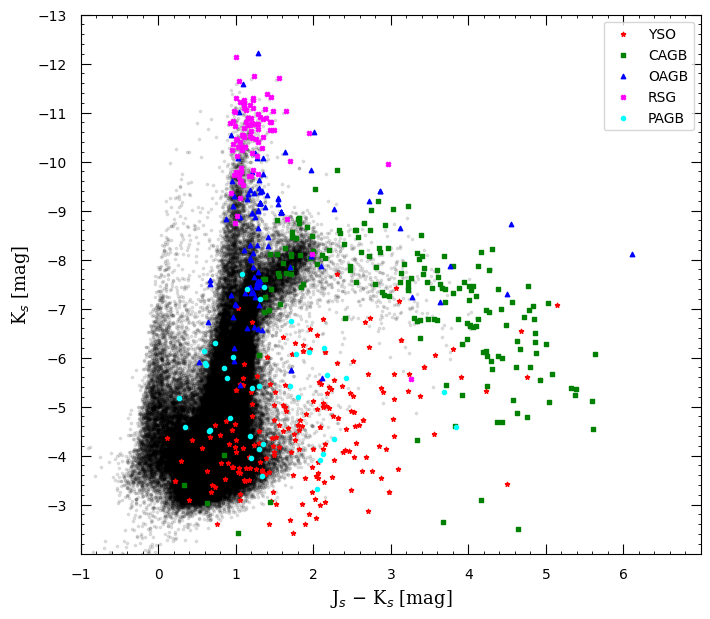

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
markers = ['*','s', '^' , "X" ,"8"]

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['2MASSKs'] - EX_J_K_LMC , All_star_LMC['2MASSKs'] - DM_LMC - Ex_K_LMC , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['Ks2mag'] - EX_J_K_SMC, All_star_SMC['Ks2mag'] - DM_SMC - Ex_K_SMC, s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df_simple[df_simple['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'] , df_['Ksmag'] , c=colors[i] ,label = SpClass[i],marker = markers[i],s=10)

plt.legend(loc='upper right')
plt.savefig('CMD_J.png', bbox_inches='tight', dpi = 400)

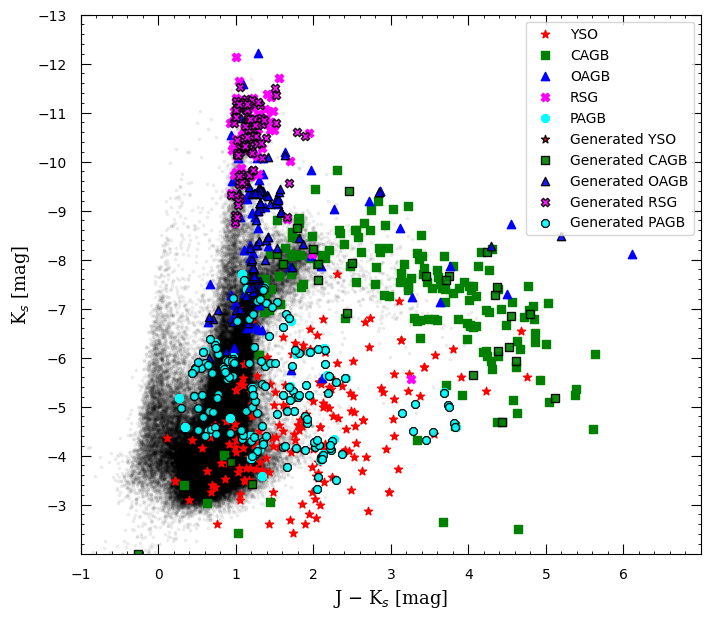

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 7 , -1
ymax , ymin = -2  , -13


plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
markers = ['*','s', '^' , "X" ,"8"]

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['2MASSKs'] - EX_J_K_LMC , All_star_LMC['2MASSKs'] - DM_LMC - Ex_K_LMC , s = 3 , c = 'black' , alpha = 0.05 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['Ks2mag'] - EX_J_K_SMC, All_star_SMC['Ks2mag'] - DM_SMC - Ex_K_SMC, s = 3 , c = 'black' , alpha = 0.05 )


#DSS
for i in range(len(SpClass)):

  df_ = df_smote.iloc[0:556]
  df_ = df_[df_['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = SpClass[i],marker = markers[i])

for i in range(len(SpClass)):
  df_ = df_smote.iloc[556:]
  df_ = df_[df_['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'], df_['Ksmag'] , c=colors[i] ,label = "Generated " + SpClass[i] ,marker = markers[i] , edgecolors='black',alpha = 0.9)


plt.legend(loc='upper right')
plt.savefig('CMD_J_Smote_Simple.png', bbox_inches='tight', dpi = 400)

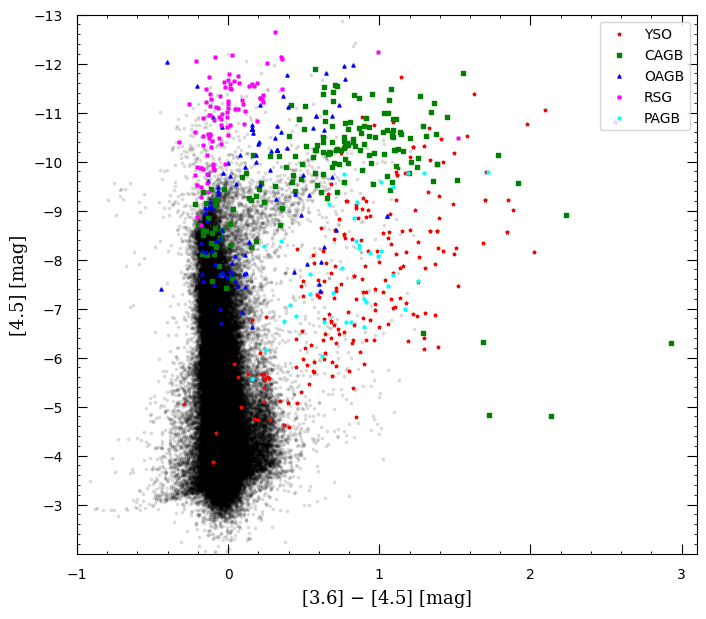

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 3.1 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
markers = ['*','s', '^' , "X" ,"8"]

plt.scatter(All_star_LMC['IRAC1'] - All_star_LMC['IRAC2'] , All_star_LMC['IRAC2'] - DM_LMC , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['IRAC1'] - All_star_SMC['IRAC2'], All_star_SMC['IRAC2'] - DM_SMC , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df_simple[df_simple['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i],marker = markers[i],s=5)

plt.legend(loc='upper right')
plt.savefig('CMD_36.png', bbox_inches='tight', dpi = 400)

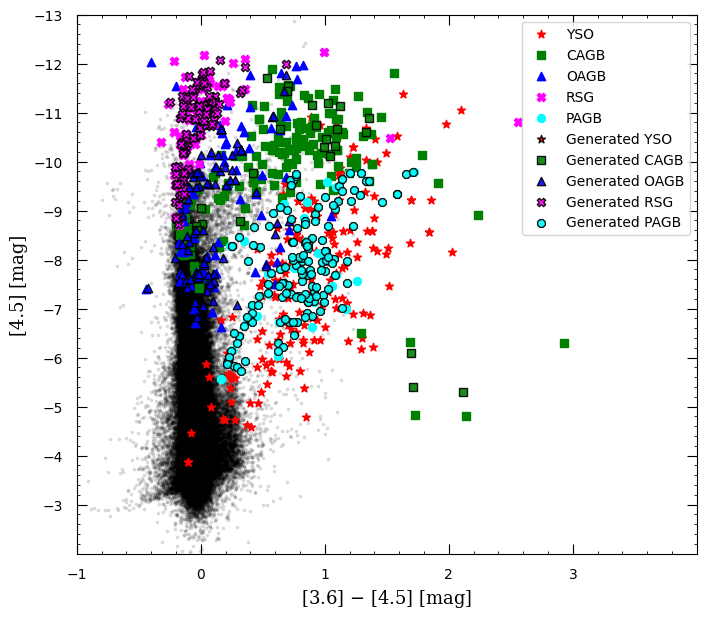

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 4 , -1
ymax , ymin = -2  , -13


plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
markers = ['*','s', '^' , "X" ,"8"]

plt.scatter(All_star_LMC['IRAC1'] - All_star_LMC['IRAC2'] , All_star_LMC['IRAC2'] - DM_LMC , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['IRAC1'] - All_star_SMC['IRAC2'], All_star_SMC['IRAC2'] - DM_SMC , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):

  df_ = df_smote.iloc[0:556]
  df_ = df_[df_['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i],marker = markers[i])

for i in range(len(SpClass)):
  df_ = df_smote.iloc[556:]
  df_ = df_[df_['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = "Generated " + SpClass[i] ,marker = markers[i] , edgecolors='black',alpha = 0.9)

plt.legend(loc='upper right')
plt.savefig('CMD_36_Smote_Simple.png', bbox_inches='tight', dpi = 400)

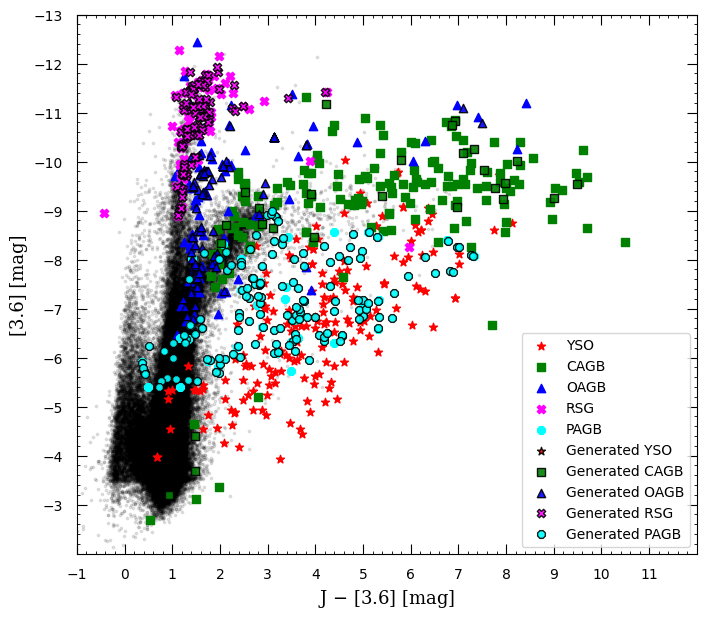

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 12, -1
ymax , ymin = -2  , -13


plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J $-$ [3.6] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[3.6] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
markers = ['*','s', '^' , "X" ,"8"]

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['IRAC1'] , All_star_LMC['IRAC1'] - DM_LMC , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['IRAC1'], All_star_SMC['IRAC1'] - DM_SMC , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):

  df_ = df_smote.iloc[0:556]
  df_ = df_[df_['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['[3.6]'], df_['[3.6]'] , c=colors[i] ,label = SpClass[i],marker = markers[i])

for i in range(len(SpClass)):
  df_ = df_smote.iloc[556:]
  df_ = df_[df_['SpClass'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['[3.6]'], df_['[3.6]'] , c=colors[i] ,label = "Generated " + SpClass[i] ,marker = markers[i] , edgecolors='black',alpha = 0.9)

plt.legend(loc='lower right')
plt.savefig('CMD_36_J_Smote_Simple.png', bbox_inches='tight', dpi = 400)

# Data Preparing Test data

## data pre

In [ ]:
df = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Preprocessed_Data.csv")

In [ ]:
df

,RAdeg,DEdeg,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],SpClass,GeneralClass
0,69.338100,-70.579000,NaN,-0.485,-2.258,-4.690,-6.112,-7.032,-7.329,-7.6101,-7.7148,-7.8326,-8.0159,-8.8792,OAGB,DSS
1,71.613100,-68.796300,1.307,1.954,0.325,-2.250,-3.502,-5.238,-6.803,-8.6656,-9.3873,-9.8100,-10.2429,-11.1944,CAGB,DSS
2,71.827700,-69.705700,-1.052,-3.148,-5.010,-7.333,-8.420,-9.248,-9.515,-9.6540,-9.4759,-9.6545,-9.7627,-10.9685,RSG,DSS
3,72.157300,-69.393600,NaN,3.178,2.261,1.023,NaN,NaN,-5.600,-8.1534,-9.0379,-9.8431,-10.6543,-13.6554,YSO,DSS
4,72.393200,-69.097000,-5.412,-5.208,-5.460,-6.105,-6.339,-6.739,-7.281,-8.4329,-8.9152,-9.2952,-9.9431,-11.3106,OAGB,DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,14.527078,-72.068717,-0.619,-0.522,-1.027,-1.728,-2.806,-3.214,-3.766,-5.5270,-5.6600,-8.0320,-9.6220,-15.6450,YSO,DSS
614,14.488457,-72.654396,-1.593,-0.817,-1.266,-1.993,-3.270,-3.795,-4.912,-6.6860,-7.2730,-8.2610,-9.2260,-15.2890,YSO,DSS
615,14.027887,-72.789808,-1.605,-1.218,-1.578,-2.070,-2.708,-3.195,-3.745,-5.4810,-5.9750,-7.7430,-9.1680,-15.3400,YSO,DSS
616,16.039817,-72.837738,-2.357,-3.880,-5.665,NaN,-8.645,-9.325,-9.593,-9.6990,-9.7110,-9.9220,-10.0500,-10.8040,OAGB,DSS


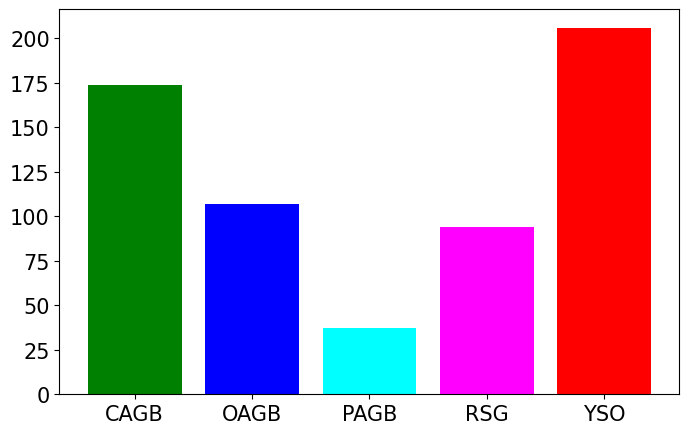

In [ ]:
n = df.pivot_table(index=['SpClass'], aggfunc='size').index
s = list(df.pivot_table(index=['SpClass'], aggfunc='size'))


colors = ['green','blue','cyan','magenta','red']

fig=plt.figure(figsize=(8,5))
line = plt.bar(n, s, log  = False, color = colors )

plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.show()
fig.savefig('SPclass_hist_colors.pdf',dpi=400)

In following cell we set a number for each label to help us in evaluate our models.

In [ ]:
from sklearn import preprocessing

LE = preprocessing.LabelEncoder()
Y = LE.fit_transform(df['SpClass'])
Y = pd.DataFrame(Y)
Y.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X = df[df.columns[2:-2]]
Y = Y['EY']

Here we use an algorithm named IterativeImputer to fill the blank (NaN) data points.

A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

A more sophisticated approach is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds. The results of the final imputation round are returned.

For more information : https://scikit-learn.org/stable/modules/impute.html#iterative-imputer

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer( random_state= 0 )
X = imp.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
MMS.fit(X)
X = MMS.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size= 0.10 , random_state = 1234 )
print('X_train : ' , X_train.shape)
print('X_test : ' , X_test.shape)
print('Y_train : ' , Y_train.shape)
print('Y_test : ' , Y_test.shape)

X_train :  (556, 12)
X_test :  (62, 12)
Y_train :  (556,)
Y_test :  (62,)


*   whitney ⇒  LMC
*   riebel  ⇒  LMC
*   Willis  ⇒ NGC 6334
*   Kamath ⇒ SMC
*   sirinvasan ⇒ LMC
*   Yang ⇒ LMC



In [ ]:
df_extinction = pd.read_csv('/content/Dusty-Stellar-Sources-Classification/Data/Extinction_DM.csv')
df_test = pd.read_csv("/content/Dusty-Stellar-Sources-Classification/Data/Final_Collected_Test_Data.csv",index_col='Unnamed: 0')
df_test.rename(columns={"Kmag":"Ksmag"},inplace=True)


df_Kamath2015 = df_test[df_test['Ref']=='Kamath2015']
df_Kamath2014 = df_test[df_test['Ref']=='Kamath2014']
df_Srinivasan2009 = df_test[df_test['Ref']=='Srinivasan2009']
df_Riebel2010 = df_test[df_test['Ref']=='Riebel2010']
df_Whitney2008 = df_test[df_test['Ref']=='Whitney2008']
df_Yang2011 = df_test[df_test['Ref']== 'Yang2011']
df_Yang2018 = df_test[df_test['Ref']== 'Yang2018']
df_Yang2021 = df_test[df_test['Ref']== 'Yang2021']
df_Yang2012 = df_test[df_test['Ref']== 'Yang2012']
df_Yang2019 = df_test[df_test['Ref']== 'Yang2019']
df_Yang2020 = df_test[df_test['Ref']== 'Yang2020']
df_Gruendl2009 = df_test[df_test['Ref']== 'Gruendl2009']
df_Boyer2011 = df_test[df_test['Ref']== 'Boyer2011']

In [ ]:
#df_Kamath2014 = pd.concat([df_Kamath2014[ df_Kamath2014['Type'] == "PAGB" ],df_Kamath2014[ df_Kamath2014['Type'] == "YSO" ]])

In [ ]:
#df_Kamath2015 = pd.concat([df_Kamath2015[ df_Kamath2015['Type'] == "PAGB" ],df_Kamath2015[ df_Kamath2015['Type'] == "YSO" ]])

In [ ]:
df_list = [ df_Kamath2015, df_Kamath2014, df_Srinivasan2009, df_Riebel2010, df_Whitney2008,
           df_Yang2018,df_Yang2021,df_Yang2019,df_Yang2020,df_Gruendl2009,df_Boyer2011]
DM_list = [ 'LMC', 'SMC' , 'LMC', 'LMC', 'LMC','LMC','LMC','SMC','SMC','LMC','SMC']

In [ ]:
for k in range(len(df_list)):
  for i in df_list[k].columns:
    for j in range(len(df_extinction)):
      if i == df_extinction['BandPass'][j]:
        df_list[k][i]  = df_list[k][i] - df_extinction[DM_list[k]][j] - df_extinction[DM_list[k]][12]

<ipython-input-55-9220e829ba8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list[k][i]  = df_list[k][i] - df_extinction[DM_list[k]][j] - df_extinction[DM_list[k]][12]


In [ ]:
df_test = pd.concat(df_list)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_test = df_test[list(df_test.columns[8:10])+list(df_test.columns[-4:])+list(df_test.columns[:8])+list(df_test.columns[10:12])]
df_test

,RAJ2000,DEJ2000,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],Ref,Type
0,72.833083,-67.101333,0.640,-0.241,-1.658,-2.935,-3.942,-4.603,-4.777,-4.870,-4.784,-4.894,-4.916,-9.685,Kamath2015,PAGB
1,73.862417,-66.842222,-0.098,-1.695,-3.199,-4.599,-5.482,-6.304,-6.625,-7.617,-8.175,-8.751,-9.489,-11.147,Kamath2015,PAGB
2,74.230125,-68.459139,0.017,-1.429,-3.123,-4.648,-5.586,-6.367,-6.513,-6.912,-7.364,-8.010,-9.449,-12.092,Kamath2015,PAGB
3,75.588208,-69.221444,-2.600,-3.408,-4.380,-5.424,-5.565,-5.886,-5.936,-6.031,-6.097,-6.184,-6.079,-10.731,Kamath2015,PAGB
4,76.633750,-71.708278,-3.994,-4.025,-4.378,-4.803,-5.115,-5.250,-5.325,-5.481,-5.643,-7.029,-9.278,-13.352,Kamath2015,PAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,28.138006,-74.251890,NaN,NaN,NaN,NaN,-5.026,-6.037,-6.761,-7.400,-7.630,-7.880,-8.140,NaN,Boyer2011,CAGB
56547,28.849220,-74.896593,NaN,NaN,NaN,NaN,-5.896,-7.037,-7.691,-8.200,-8.140,-8.310,-8.680,NaN,Boyer2011,CAGB
56548,29.054917,-73.477329,NaN,NaN,NaN,NaN,-5.696,-6.697,-7.281,-7.910,-7.800,-7.990,-8.400,NaN,Boyer2011,CAGB
56549,32.181180,-75.020332,NaN,NaN,NaN,NaN,-6.266,-7.197,-7.681,-8.180,-8.030,-8.180,-8.520,NaN,Boyer2011,CAGB


(array([   45.,     0.,  8567.,     0.,     0.,  3345.,     0., 38066.,
            0.,  6528.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

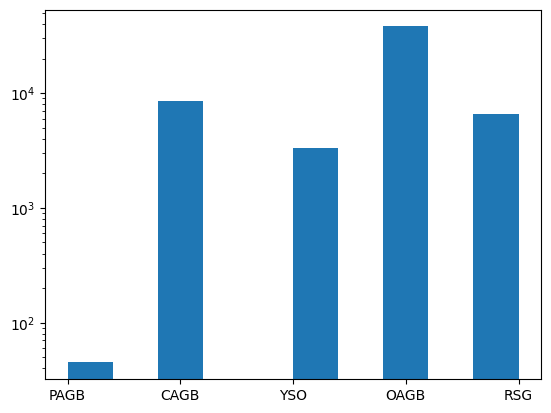

In [ ]:
plt.hist(df_test.Type,log=True)

In [ ]:
list_row_nan = []
list_Class = []
list_row_nan_6 = []
list_Class_6 = []
list_index_6 = []
for i in range(0,len(df_test)):
  count_nan = df_test.iloc[i].isnull().sum()
  list_row_nan.append(count_nan)
  if count_nan > 6 :
    list_row_nan_6.append(count_nan)
    list_Class_6.append(df_test.iloc[i][-1])
    list_index_6.append(i)

(array([1524.,    0.,  562.,    0.,  125.,    0.,   32.,    0.,    0.,
           2.]),
 array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. ]),
 <BarContainer object of 10 artists>)

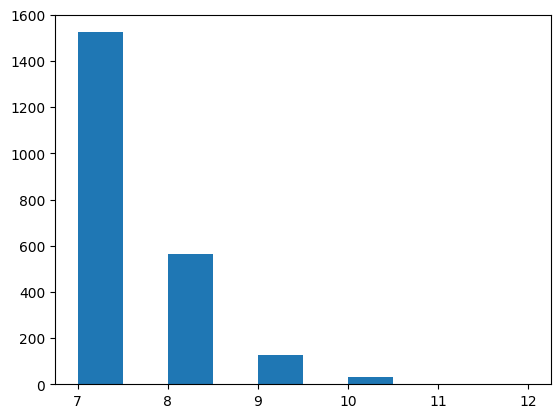

In [ ]:
plt.hist(list_row_nan_6)

(array([[1.1600e+02, 0.0000e+00, 3.0000e+01, 0.0000e+00, 0.0000e+00,
         1.7030e+03, 0.0000e+00, 3.9600e+02, 0.0000e+00, 0.0000e+00],
        [3.8066e+04, 0.0000e+00, 8.5670e+03, 0.0000e+00, 0.0000e+00,
         3.3450e+03, 0.0000e+00, 6.5280e+03, 0.0000e+00, 4.5000e+01]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 2 BarContainer objects>)

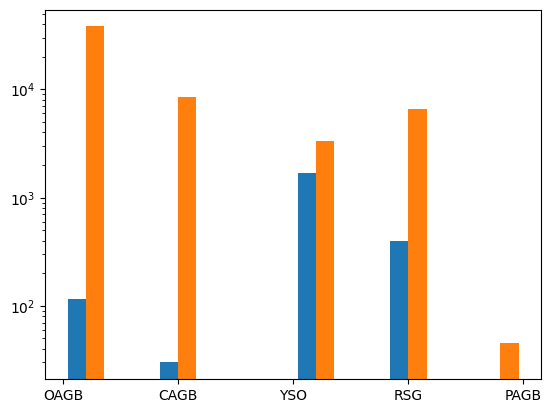

In [ ]:
plt.hist([list_Class_6,df_test['Type']],log=True)

In [ ]:
df_test.drop(list_index_6, axis=0, inplace=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
df_test

,RAJ2000,DEJ2000,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],Ref,Type
0,72.833083,-67.101333,0.640,-0.241,-1.658,-2.935,-3.942,-4.603,-4.777,-4.870,-4.784,-4.894,-4.916,-9.685,Kamath2015,PAGB
1,73.862417,-66.842222,-0.098,-1.695,-3.199,-4.599,-5.482,-6.304,-6.625,-7.617,-8.175,-8.751,-9.489,-11.147,Kamath2015,PAGB
2,74.230125,-68.459139,0.017,-1.429,-3.123,-4.648,-5.586,-6.367,-6.513,-6.912,-7.364,-8.010,-9.449,-12.092,Kamath2015,PAGB
3,75.588208,-69.221444,-2.600,-3.408,-4.380,-5.424,-5.565,-5.886,-5.936,-6.031,-6.097,-6.184,-6.079,-10.731,Kamath2015,PAGB
4,76.633750,-71.708278,-3.994,-4.025,-4.378,-4.803,-5.115,-5.250,-5.325,-5.481,-5.643,-7.029,-9.278,-13.352,Kamath2015,PAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54301,28.138006,-74.251890,NaN,NaN,NaN,NaN,-5.026,-6.037,-6.761,-7.400,-7.630,-7.880,-8.140,NaN,Boyer2011,CAGB
54302,28.849220,-74.896593,NaN,NaN,NaN,NaN,-5.896,-7.037,-7.691,-8.200,-8.140,-8.310,-8.680,NaN,Boyer2011,CAGB
54303,29.054917,-73.477329,NaN,NaN,NaN,NaN,-5.696,-6.697,-7.281,-7.910,-7.800,-7.990,-8.400,NaN,Boyer2011,CAGB
54304,32.181180,-75.020332,NaN,NaN,NaN,NaN,-6.266,-7.197,-7.681,-8.180,-8.030,-8.180,-8.520,NaN,Boyer2011,CAGB


In [ ]:
Y_TEST = LE.transform(df_test['Type'])
Y_TEST = pd.DataFrame(Y_TEST)
Y_TEST.columns = ['EY']

print('Ordinal Encoding:')
LE.inverse_transform(np.arange(0,5))

Ordinal Encoding:


array(['CAGB', 'OAGB', 'PAGB', 'RSG', 'YSO'], dtype=object)

In [ ]:
X_TEST = df_test[df_test.columns[2:-2]]
Y_TEST = Y_TEST['EY']

In [ ]:
X_TEST = imp.transform(X_TEST)

In [ ]:
X_TEST = MMS.transform(X_TEST)

(array([2.30000e+01, 2.38000e+02, 5.92000e+03, 1.89420e+05, 2.38723e+05,
        8.24550e+04, 6.45160e+04, 6.10220e+04, 9.31700e+03, 3.80000e+01]),
 array([-0.15990578,  0.00854643,  0.17699864,  0.34545086,  0.51390307,
         0.68235528,  0.85080749,  1.0192597 ,  1.18771191,  1.35616413,
         1.52461634]),
 <BarContainer object of 10 artists>)

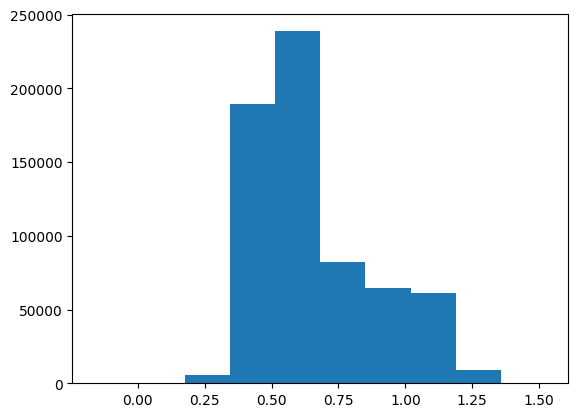

In [ ]:
plt.hist(X_TEST.reshape(-1))

(array([ 8537.,     0., 37950.,     0.,     0.,    45.,     0.,  6132.,
            0.,  1642.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

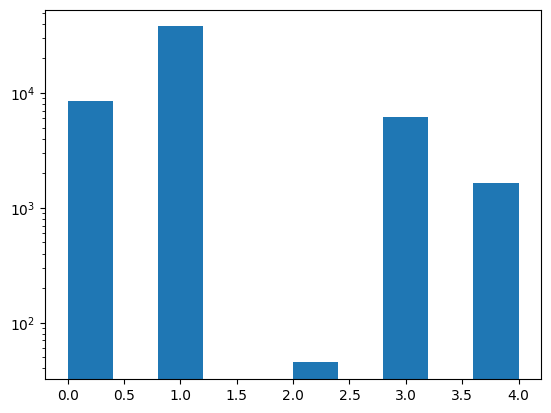

In [ ]:
plt.hist(Y_TEST,log=True)

(array([   45.,     0.,  8537.,     0.,     0.,  1642.,     0., 37950.,
            0.,  6132.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

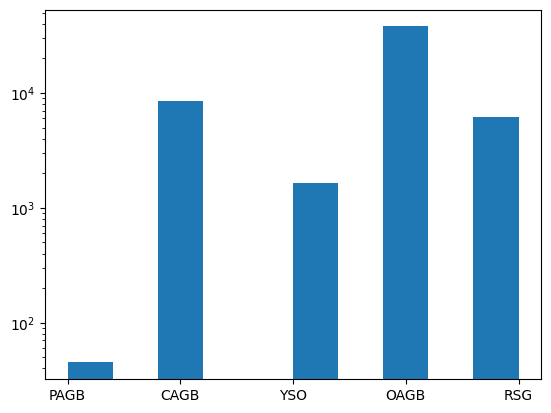

In [ ]:
plt.hist(df_test['Type'],log=True)

(array([  236.,    95., 41193.,  1025.,   360.,   126.,  2467.,    88.,
          180.,  8536.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

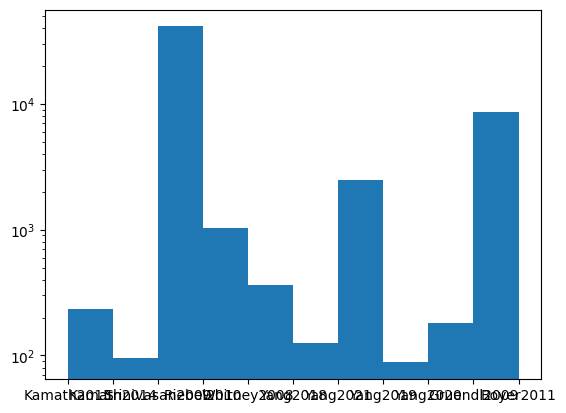

In [ ]:
plt.hist(df_test['Ref'],log=True)

In [ ]:
df_test

,RAJ2000,DEJ2000,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],Ref,Type
0,72.833083,-67.101333,0.640,-0.241,-1.658,-2.935,-3.942,-4.603,-4.777,-4.870,-4.784,-4.894,-4.916,-9.685,Kamath2015,PAGB
1,73.862417,-66.842222,-0.098,-1.695,-3.199,-4.599,-5.482,-6.304,-6.625,-7.617,-8.175,-8.751,-9.489,-11.147,Kamath2015,PAGB
2,74.230125,-68.459139,0.017,-1.429,-3.123,-4.648,-5.586,-6.367,-6.513,-6.912,-7.364,-8.010,-9.449,-12.092,Kamath2015,PAGB
3,75.588208,-69.221444,-2.600,-3.408,-4.380,-5.424,-5.565,-5.886,-5.936,-6.031,-6.097,-6.184,-6.079,-10.731,Kamath2015,PAGB
4,76.633750,-71.708278,-3.994,-4.025,-4.378,-4.803,-5.115,-5.250,-5.325,-5.481,-5.643,-7.029,-9.278,-13.352,Kamath2015,PAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54301,28.138006,-74.251890,NaN,NaN,NaN,NaN,-5.026,-6.037,-6.761,-7.400,-7.630,-7.880,-8.140,NaN,Boyer2011,CAGB
54302,28.849220,-74.896593,NaN,NaN,NaN,NaN,-5.896,-7.037,-7.691,-8.200,-8.140,-8.310,-8.680,NaN,Boyer2011,CAGB
54303,29.054917,-73.477329,NaN,NaN,NaN,NaN,-5.696,-6.697,-7.281,-7.910,-7.800,-7.990,-8.400,NaN,Boyer2011,CAGB
54304,32.181180,-75.020332,NaN,NaN,NaN,NaN,-6.266,-7.197,-7.681,-8.180,-8.030,-8.180,-8.520,NaN,Boyer2011,CAGB


In [ ]:
df_test

,RAJ2000,DEJ2000,Umag,Bmag,Vmag,Imag,Jmag,Hmag,Ksmag,[3.6],[4.5],[5.8],[8.0],[24],Ref,Type
0,72.833083,-67.101333,0.640,-0.241,-1.658,-2.935,-3.942,-4.603,-4.777,-4.870,-4.784,-4.894,-4.916,-9.685,Kamath2015,PAGB
1,73.862417,-66.842222,-0.098,-1.695,-3.199,-4.599,-5.482,-6.304,-6.625,-7.617,-8.175,-8.751,-9.489,-11.147,Kamath2015,PAGB
2,74.230125,-68.459139,0.017,-1.429,-3.123,-4.648,-5.586,-6.367,-6.513,-6.912,-7.364,-8.010,-9.449,-12.092,Kamath2015,PAGB
3,75.588208,-69.221444,-2.600,-3.408,-4.380,-5.424,-5.565,-5.886,-5.936,-6.031,-6.097,-6.184,-6.079,-10.731,Kamath2015,PAGB
4,76.633750,-71.708278,-3.994,-4.025,-4.378,-4.803,-5.115,-5.250,-5.325,-5.481,-5.643,-7.029,-9.278,-13.352,Kamath2015,PAGB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54301,28.138006,-74.251890,NaN,NaN,NaN,NaN,-5.026,-6.037,-6.761,-7.400,-7.630,-7.880,-8.140,NaN,Boyer2011,CAGB
54302,28.849220,-74.896593,NaN,NaN,NaN,NaN,-5.896,-7.037,-7.691,-8.200,-8.140,-8.310,-8.680,NaN,Boyer2011,CAGB
54303,29.054917,-73.477329,NaN,NaN,NaN,NaN,-5.696,-6.697,-7.281,-7.910,-7.800,-7.990,-8.400,NaN,Boyer2011,CAGB
54304,32.181180,-75.020332,NaN,NaN,NaN,NaN,-6.266,-7.197,-7.681,-8.180,-8.030,-8.180,-8.520,NaN,Boyer2011,CAGB


In [ ]:
label_counts  = df_test.groupby('Ref')['Type'].count()
label_counts

Ref
Boyer2011          7446
Gruendl2009        1090
Kamath2014           95
Kamath2015          236
Riebel2010         1025
Srinivasan2009    41193
Whitney2008         360
Yang2018            126
Yang2019             88
Yang2020            180
Yang2021           2467
Name: Type, dtype: int64

In [ ]:
df_Kamath2015 = df_test[df_test['Ref']=='Kamath2015']
df_Kamath2014 = df_test[df_test['Ref']=='Kamath2014']
df_Srinivasan2009 = df_test[df_test['Ref']=='Srinivasan2009']
df_Riebel2010 = df_test[df_test['Ref']=='Riebel2010']
df_Whitney2008 = df_test[df_test['Ref']=='Whitney2008']
df_Yang2011 = df_test[df_test['Ref']== 'Yang2011']
df_Yang2018 = df_test[df_test['Ref']== 'Yang2018']
df_Yang2021 = df_test[df_test['Ref']== 'Yang2021']
df_Yang2012 = df_test[df_test['Ref']== 'Yang2012']
df_Yang2019 = df_test[df_test['Ref']== 'Yang2019']
df_Yang2020 = df_test[df_test['Ref']== 'Yang2020']
df_Gruendl2009 = df_test[df_test['Ref']== 'Gruendl2009']
df_Boyer2011 = df_test[df_test['Ref']== 'Boyer2011']

In [ ]:
label_counts  = df_test.groupby('Ref')['Type'].count()
label_counts

Ref
Boyer2011          7446
Gruendl2009        1090
Kamath2014           95
Kamath2015          236
Riebel2010         1025
Srinivasan2009    41193
Whitney2008         360
Yang2018            126
Yang2019             88
Yang2020            180
Yang2021           2467
Name: Type, dtype: int64

In [ ]:
df_list = [df_Kamath2015, df_Kamath2014, df_Srinivasan2009, df_Riebel2010, df_Whitney2008,
           df_Yang2018,df_Yang2021,df_Yang2019,df_Yang2020,df_Gruendl2009 ,df_Boyer2011]
for i in df_list:
  df_prime = i
  label_counts  = df_prime.groupby('Type')['Type'].count()
  print(df_prime.loc[list(df_prime.index)[0],"Ref"])
  print(label_counts)
  print(len(df_prime))
  print("++++++++++++++++")

Kamath2015
Type
CAGB     51
PAGB     31
YSO     154
Name: Type, dtype: int64
236
++++++++++++++++
Kamath2014
Type
CAGB    43
PAGB    14
YSO     38
Name: Type, dtype: int64
95
++++++++++++++++
Srinivasan2009
Type
CAGB     6609
OAGB    34584
Name: Type, dtype: int64
41193
++++++++++++++++
Riebel2010
Type
CAGB    116
OAGB    909
Name: Type, dtype: int64
1025
++++++++++++++++
Whitney2008
Type
YSO    360
Name: Type, dtype: int64
360
++++++++++++++++
Yang2018
Type
RSG    126
Name: Type, dtype: int64
126
++++++++++++++++
Yang2021
Type
RSG    2467
Name: Type, dtype: int64
2467
++++++++++++++++
Yang2019
Type
RSG    88
Name: Type, dtype: int64
88
++++++++++++++++
Yang2020
Type
RSG    180
Name: Type, dtype: int64
180
++++++++++++++++
Gruendl2009
Type
YSO    1090
Name: Type, dtype: int64
1090
++++++++++++++++
Boyer2011
Type
CAGB    1718
OAGB    2457
RSG     3271
Name: Type, dtype: int64
7446
++++++++++++++++


In [ ]:
df_test.to_csv("Final_absolute_test_data.csv",index=None)

## data visualization

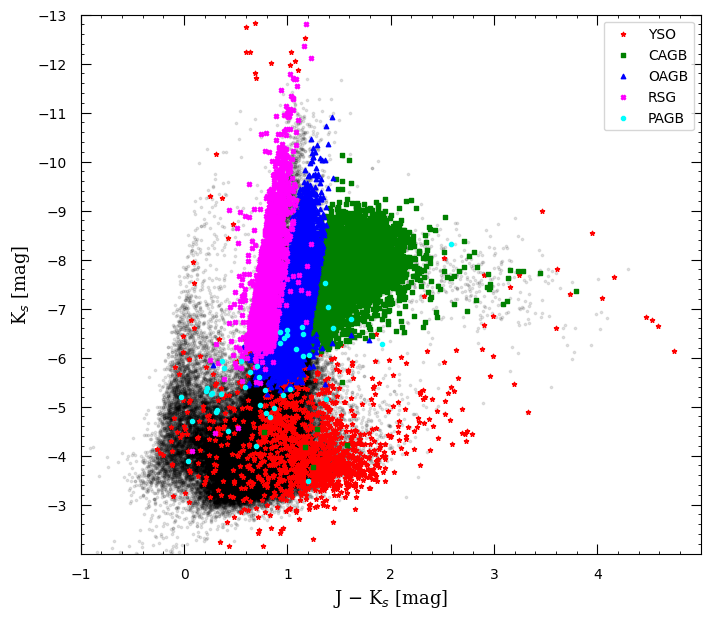

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 6 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
markers = ['*','s', '^' , "X" ,"8"]

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['2MASSKs'] - EX_J_K_LMC , All_star_LMC['2MASSKs'] - DM_LMC - Ex_K_LMC , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['Ks2mag'] - EX_J_K_SMC, All_star_SMC['Ks2mag'] - DM_SMC - Ex_K_SMC, s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df_test[df_test['Type'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['Ksmag'] , df_['Ksmag'] , c=colors[i] ,label = SpClass[i],marker = markers[i],s=10,alpha=1)

plt.legend(loc='upper right')
plt.savefig('CMD_J_test.png', bbox_inches='tight', dpi = 400)

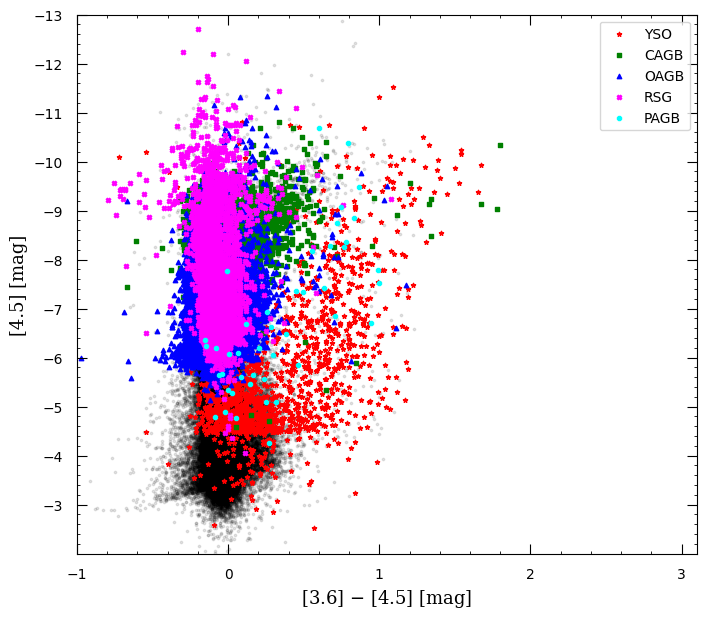

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 3.1 , -1
ymax , ymin = -2  , -13

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('[3.6] $-$ [4.5] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[4.5] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
markers = ['*','s', '^' , "X" ,"8"]

plt.scatter(All_star_LMC['IRAC1'] - All_star_LMC['IRAC2'] , All_star_LMC['IRAC2'] - DM_LMC , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['IRAC1'] - All_star_SMC['IRAC2'], All_star_SMC['IRAC2'] - DM_SMC , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):
  df_ = df_test[df_test['Type'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['[3.6]'] - df_['[4.5]'], df_['[4.5]'] , c=colors[i] ,label = SpClass[i],marker = markers[i],s=10,alpha = 1)

plt.legend(loc='upper right')
plt.savefig('CMD_36_test.png', bbox_inches='tight', dpi = 400)

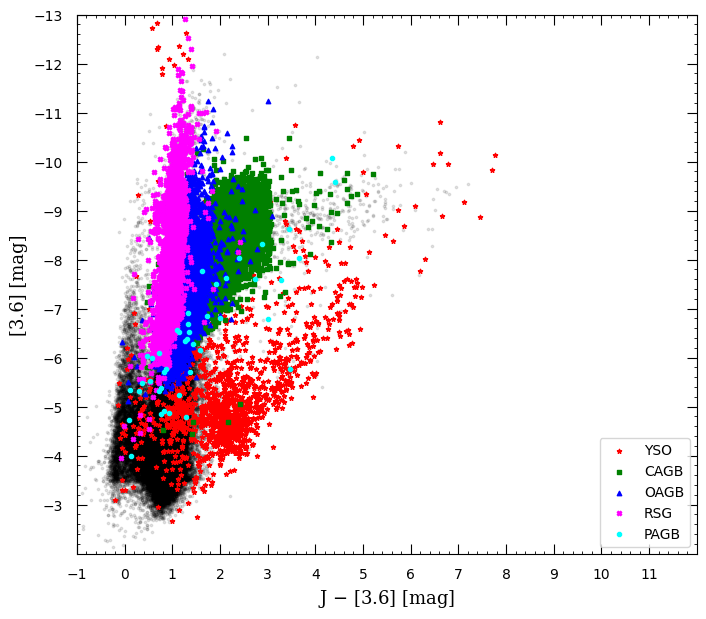

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

#plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 12, -1
ymax , ymin = -2  , -13


plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

plt.xlabel('J $-$ [3.6] [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('[3.6] [mag]'          , fontsize = 13, fontname = "serif")

colors = ['red','green','blue','magenta','cyan']
SpClass = ['YSO','CAGB','OAGB','RSG','PAGB']
markers = ['*','s', '^' , "X" ,"8"]

plt.scatter(All_star_LMC['2MASSJ'] - All_star_LMC['IRAC1'] , All_star_LMC['IRAC1'] - DM_LMC , s = 3 , c = 'black' , alpha = 0.1 )
plt.scatter(All_star_SMC['J2mag'] - All_star_SMC['IRAC1'], All_star_SMC['IRAC1'] - DM_SMC , s = 3 , c = 'black' , alpha = 0.1 )

#DSS
for i in range(len(SpClass)):

  df_ = df_test
  df_ = df_[df_['Type'] == SpClass[i]]
  color_ = colors[i]
  plt.scatter(df_['Jmag'] - df_['[3.6]'], df_['[3.6]'] , c=colors[i] ,label = SpClass[i],marker = markers[i],s=10,alpha = 1)

plt.legend(loc='lower right')
plt.savefig('CMD_36_J_test.png', bbox_inches='tight', dpi = 400)